<a href="https://colab.research.google.com/github/sjherman/Selenium-Webdriver-w-Python/blob/master/NB_1_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 1**

In [0]:
#Import packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import tree 
from IPython.display import Image

## 1. Upload the AUTO.csv file and import using Pandas


In [103]:
# Code found at https://colab.research.google.com/notebooks/io.ipynb#scrollTo=BaCkyg5CV5jF
# Uploads the dataset 

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AUTO.csv to AUTO (1).csv
User uploaded file "AUTO.csv" with length 9621 bytes


In [104]:
# Imports using Pandas and prints the header

Auto = pd.read_csv("AUTO.csv")
Auto.head()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31,Regular,13.2,172,101,67,39,"2,635",47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22,Premium,17.1,193,108,70,40,"3,460",50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22,Regular,17.5,195,109,73,40,"3,350",50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20,Regular,17.5,200,112,74,42,"3,640",51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21,Regular,18.5,207,114,75,43,"3,880",51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


In [105]:
# Column names
Auto.columns

Index(['Name', 'Drive Type', 'Mileage (mpg)', 'Fuel Type', 'Capacity (gal)',
       'Length (inches)', 'Wheel Base (inches)', 'Width (inches)',
       'Turning Circle (feet)', 'Weight (lbs)', 'Door Top (inches)',
       'Luggage (cu. ft.)', 'Front Shoulder (inches)',
       'Front Leg Room (inches)', 'Front Head Room (inches)',
       'Rear Shoulder (inches)', 'Rear Leg Room (inches)',
       'Rear Head Room (inches)'],
      dtype='object')

In [106]:
# Data shape
Auto.shape

(106, 18)

In [107]:
# Data type for each column
Auto.dtypes

Name                         object
Drive Type                   object
Mileage (mpg)                 int64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)               int64
Wheel Base (inches)           int64
Width (inches)                int64
Turning Circle (feet)         int64
Weight (lbs)                 object
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object

In [111]:
# Convert 'Weight (lbs)' from object to integer

Auto = Auto.replace(',','',regex=True)
Auto['Weight (lbs)'] = pd.to_numeric(Auto['Weight (lbs)'])
Auto.dtypes

Name                         object
Drive Type                   object
Mileage (mpg)                 int64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)               int64
Wheel Base (inches)           int64
Width (inches)                int64
Turning Circle (feet)         int64
Weight (lbs)                  int64
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object

## 2. Replace any missing values with the median valuable of the variable.

In [112]:
# Columns with NA values

Auto.columns[Auto.isnull().any()]

Index(['Luggage (cu. ft.)'], dtype='object')

In [113]:
# Display rows with NA values

Auto[np.isnan(Auto['Luggage (cu. ft.)'])]

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
87,Ford F-150,Rear,15,Regular,25.0,226,139,80,49,5210,70.5,NaN,63.5,42.0,7.0,60.0,24.5,2.5
88,Ford Ranger,Rear,18,Regular,20.0,202,126,70,45,3870,60.0,NaN,54.0,42.5,5.0,18.0,22.5,2.0


In [0]:
# Replace NA values with the median of the variable

Auto['Luggage (cu. ft.)'].fillna(Auto['Luggage (cu. ft.)'].median(), inplace=True)

In [115]:
# Show the rows that had NA values to see if they were replaced

Auto.loc[[87,88]]

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
87,Ford F-150,Rear,15,Regular,25.0,226,139,80,49,5210,70.5,16.0,63.5,42.0,7.0,60.0,24.5,2.5
88,Ford Ranger,Rear,18,Regular,20.0,202,126,70,45,3870,60.0,16.0,54.0,42.5,5.0,18.0,22.5,2.0


## 3.	Explore the general characteristics of the data, by computing the means and standard deviations of the numerical attributes, as well as the distributions of “drive type” and “fuel type”.

In [127]:
# Mean and standard deviation
Auto_mean = Auto.mean()
Auto_std = Auto.std()

# Creates a dataframe with feature name, mean, and standard deviation
Auto_desc = pd.DataFrame({'mean':Auto_mean, 'std':Auto_std})
Auto_desc

,mean,std
Mileage (mpg),21.292453,3.769469
Capacity (gal),17.883019,3.425714
Length (inches),187.594340,12.493639
Wheel Base (inches),107.632075,7.014713
Width (inches),70.915094,3.237041
Turning Circle (feet),39.849057,2.797252
Weight (lbs),3502.311321,633.453939
Door Top (inches),53.891509,5.747465
Luggage (cu. ft.),25.056604,18.235538
Front Shoulder (inches),56.471698,3.041640


In [135]:
# 'Drive Type' distribution 

pd.DataFrame(Auto.groupby('Drive Type').size())

,0
Drive Type,
Front,81
Rear,25


In [136]:
# 'Fuel Type' distribution

pd.DataFrame(Auto.groupby('Fuel Type').size())

,0
Fuel Type,
Premium,19
Regular,86
Regular,1


## 4.	Use z-score normalization to standardize the values of the Weight attribute. Show the results side-by-side with the original Weight attribute.

In [179]:
# Creates a dataframe for the original 'Weight (lbs)'
Weight_ogn = pd.DataFrame(Auto['Weight (lbs)'])

# Z-score normalization of 'Weight (lbs)'
Weight_Z = pd.DataFrame((Auto['Weight (lbs)'] - Auto['Weight (lbs)'].mean())/Auto['Weight (lbs)'].std())
# Change the name of the column
Weight_Z.columns = ['Z Score']

# Concatenate the two colums to display side-by-side
pd.concat([Weight_ogn, Weight_Z], axis=1).head(10)

,Weight (lbs),Z Score
0,2635,-1.369178
1,3460,-0.066795
2,3350,-0.240446
3,3640,0.217362
4,3880,0.596237
5,3325,-0.279912
6,2795,-1.116595
7,3495,-0.011542
8,3350,-0.240446
9,3075,-0.674574


## 5. Convert the categorical variables into dummies.

In [182]:
# Converts 'Drive Type' into dummie variables

DT_dummies = pd.DataFrame(pd.get_dummies(Auto['Drive Type']))
DT_dummies

,Front,Rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
101,0,1
102,0,1
103,0,1
104,0,1


In [183]:
# Converts 'Fuel Type' into dummie variables

FT_dummies = pd.DataFrame(pd.get_dummies(Auto['Fuel Type']))
FT_dummies

,Premium,Regular,Regular
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
101,0,1,0
102,0,0,1
103,0,1,0
104,0,1,0


## 6. Perform basic correlation analysis among the attributes. Perform both numeric and visual correlation outputs.

In [193]:
# Create a dataframe with only the numeric features
Auto_num = Auto.select_dtypes(include=np.number)

# Create a display the correlation Matrix
Auto_cor = Auto_num.corr()
Auto_cor

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
Mileage (mpg),1.000000,-0.787515,-0.387151,-0.512751,-0.578650,-0.571132,-0.875434,-0.771332,-0.619985,-0.607314,0.053420,-0.236747,-0.269556,-0.274588,-0.654005
Capacity (gal),-0.787515,1.000000,0.505427,0.660131,0.678437,0.526678,0.888074,0.752458,0.716461,0.722434,-0.014806,0.274185,0.213711,0.371609,0.647434
Length (inches),-0.387151,0.505427,1.000000,0.869492,0.832541,0.684696,0.550863,0.117489,0.240717,0.787516,0.268169,0.203634,0.203753,0.530583,0.200537
Wheel Base (inches),-0.512751,0.660131,0.869492,1.000000,0.791321,0.641709,0.678488,0.411330,0.448967,0.790025,0.232445,0.294628,0.116297,0.407676,0.361039
Width (inches),-0.578650,0.678437,0.832541,0.791321,1.000000,0.642269,0.743765,0.403390,0.450949,0.909002,0.091544,0.294469,0.400622,0.501899,0.416956
Turning Circle (feet),-0.571132,0.526678,0.684696,0.641709,0.642269,1.000000,0.625479,0.413344,0.384132,0.624658,0.116876,0.251681,0.138586,0.340659,0.315220
Weight (lbs),-0.875434,0.888074,0.550863,0.678488,0.743765,0.625479,1.000000,0.777217,0.656608,0.762697,0.022551,0.242911,0.319833,0.388947,0.624352
Door Top (inches),-0.771332,0.752458,0.117489,0.411330,0.403390,0.413344,0.777217,1.000000,0.803932,0.498575,-0.240942,0.388512,0.175732,0.065755,0.742755
Luggage (cu. ft.),-0.619985,0.716461,0.240717,0.448967,0.450949,0.384132,0.656608,0.803932,1.000000,0.603918,-0.222359,0.358312,0.201275,0.314236,0.791403
Front Shoulder (inches),-0.607314,0.722434,0.787516,0.790025,0.909002,0.624658,0.762697,0.498575,0.603918,1.000000,0.063630,0.329347,0.441564,0.550277,0.570227


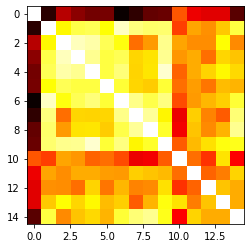

In [194]:
plt.imshow(Auto_cor, cmap='hot')